In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Twitter Sentiments.csv to Twitter Sentiments (3).csv


In [108]:
df=pd.read_csv("Twitter Sentiments.csv")
pd.set_option('display.max_colwidth', None)

count_label_0 = (df['label'] == 0).sum()
count_label_1 = (df['label'] == 1).sum()

# Calculate the difference in counts
count_difference = int((count_label_0 - count_label_1)/1.15)

if count_difference > 0:
    indices_to_delete = df[df['label'] == 0].sample(count_difference, random_state=42).index
    df = df.drop(indices_to_delete)


print(df['label'].value_counts())

df.head()

0    5827
1    2242
Name: label, dtype: int64


,id,label,tweet
9,10,0,@user @user welcome here ! i'm it's so #gr8 !
11,12,0,we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love #
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
15,16,0,ouch...junior is angryð#got7 #junior #yugyoem #omg


In [109]:
df.tail()

,id,label,tweet
31948,31949,1,"makes you ask yourself, who am i? then am i anybody? until ....god . oh thank you god!"
31950,31951,0,"@user you can try to 'tail' us to stop, 'butt' we're just having too good of a time! #goldenretriever #animals"
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [110]:
df.shape

(8069, 3)

In [111]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [112]:
df.drop("id", axis=1, inplace=True)
df.head()

,label,tweet
9,0,@user @user welcome here ! i'm it's so #gr8 !
11,0,we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love #
13,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
15,0,ouch...junior is angryð#got7 #junior #yugyoem #omg


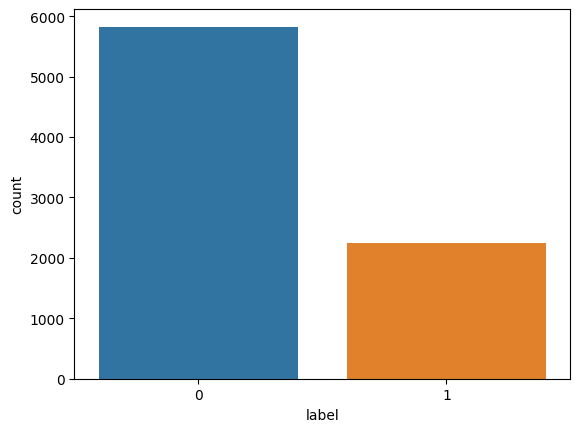

In [113]:
sns.countplot(x='label', data=df, label="Count")
plt.show()

In [114]:
df["length"]=df["tweet"].apply(len)

In [115]:
df.head()

,label,tweet,length
9,0,@user @user welcome here ! i'm it's so #gr8 !,50
11,0,we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love #,133
13,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot,74
14,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins,101
15,0,ouch...junior is angryð#got7 #junior #yugyoem #omg,56


<Axes: ylabel='Frequency'>

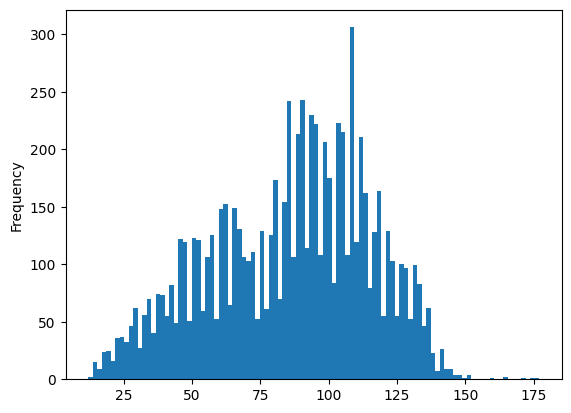

In [116]:
df["length"].plot(bins=100,kind='hist')

In [117]:
df.describe()

,label,length
count,8069.000000,8069.000000
mean,0.277854,85.914735
std,0.447969,29.284754
min,0.000000,12.000000
25%,0.000000,64.000000
50%,0.000000,90.000000
75%,1.000000,109.000000
max,1.000000,177.000000


In [118]:
df[df['length']==12]['tweet'].iloc[0]

'shut up rat '

In [119]:
df[df['length']==84]['tweet'].iloc[0]

'g o a l s ð\x9f\x92\x99 repost from @user #propey #ocean #summer   #life #family @ sydneyâ\x80¦ '

In [120]:
sentences=df['tweet'].tolist()

In [121]:
sentences

[" @user @user welcome here !  i'm   it's so #gr8 ! ",
 'we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #',
 "@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  ",
 'no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins',
 'ouch...junior is angryð\x9f\x98\x90#got7 #junior #yugyoem   #omg ',
 'retweet if you agree! ',
 'as we all know, essential oils are not made of chemicals. ',
 '@user @user lumpy says i am a . prove it lumpy.',
 "happy father's day @user ð\x9f\x92\x93ð\x9f\x92\x93ð\x9f\x92\x93ð\x9f\x92\x93  ",
 "50 people went to nightclub to have a good night and 1 man's actions means those people are lost to their families forever #rip#orlando",
 "it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia ",
 'i am amazing. #i_am #positive #affirmation     ',
 '@user lets fight agains

In [123]:
len(sentences)

8069

In [122]:
sentences_as_one_string=" ".join(sentences)

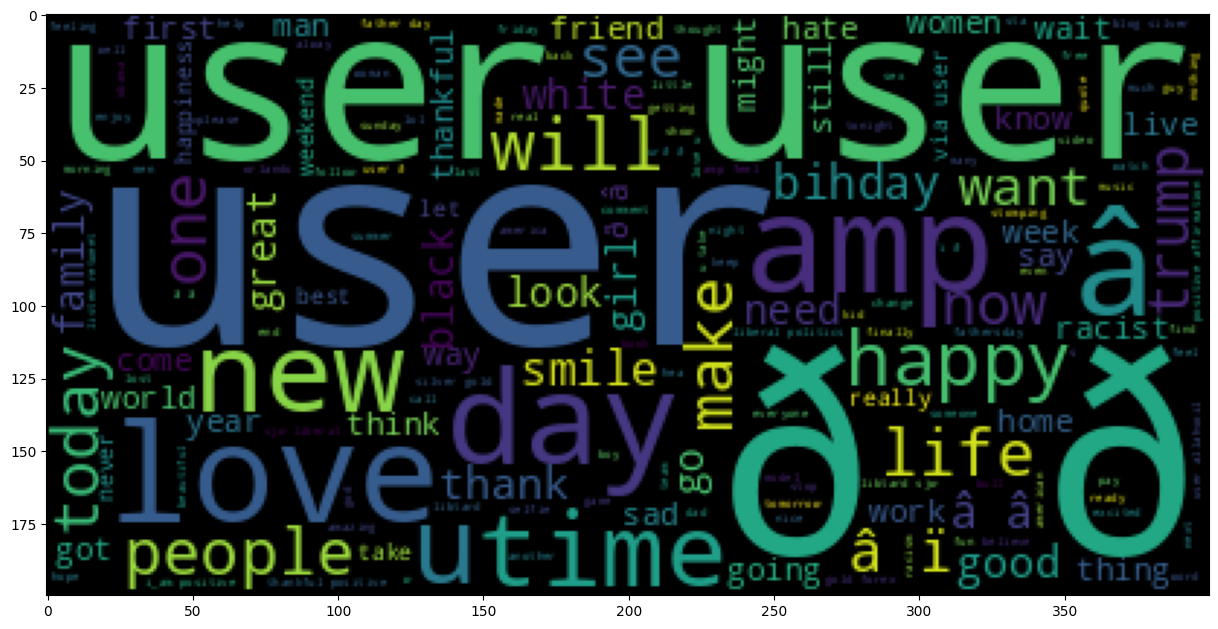

In [124]:
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [125]:
positive=df[df['label']==0]
positive

,label,tweet,length
9,0,@user @user welcome here ! i'm it's so #gr8 !,50
11,0,we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love #,133
15,0,ouch...junior is angryð#got7 #junior #yugyoem #omg,56
19,0,"as we all know, essential oils are not made of chemicals.",58
28,0,happy father's day @user ðððð,43
...,...,...,...
31937,0,love island ð,18
31938,0,my fav actor #vijaysethupathi ! my fav actress @user ! my most fav director @user !! one film !! can't wait :),112
31950,0,"@user you can try to 'tail' us to stop, 'butt' we're just having too good of a time! #goldenretriever #animals",115
31957,0,ate @user isz that youuu?ðððððððððâ¤ï¸,68


In [126]:
negative=df[df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot,74
14,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenny #kentucky,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'm proud! #mailboxpride #liberalisme,82
31947,1,@user @user you don't have the balls to hashtag me as a but you say i am to weasel away.. lumpy tony.. dipshit.,112
31948,1,"makes you ask yourself, who am i? then am i anybody? until ....god . oh thank you god!",87


In [127]:
sentences_negative=negative['tweet'].tolist()

In [128]:
negative_sentences_as_one_string=" ".join(sentences_negative)

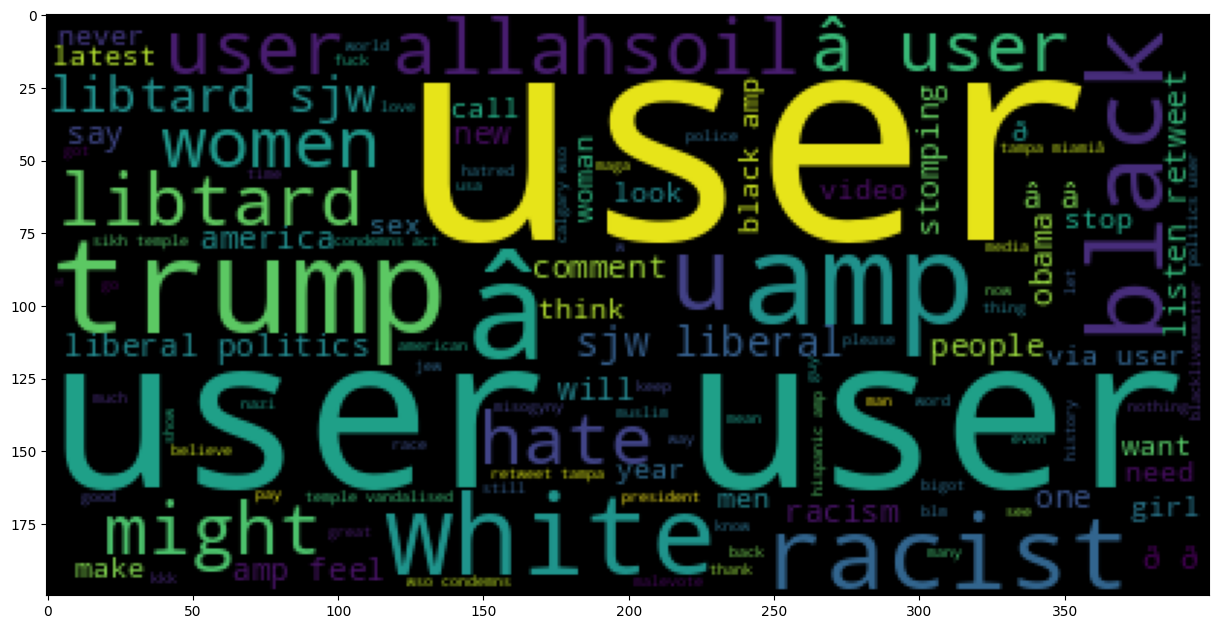

In [129]:
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

In [130]:
#Data Cleaning - removing punctuation

In [131]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [132]:
test="good morning beautiful people:)... I having fun learning machine learning #enjoy"

In [133]:
test_punc_removed=[]
for char in test:
    if char not in string.punctuation:
        test_punc_removed.append(char)
test_punc_removed_join=''.join(test_punc_removed)
test_punc_removed_join

'good morning beautiful people I having fun learning machine learning enjoy'

In [134]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [135]:
test_punc_removed_join_clean= [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
test_punc_removed_join_clean

['good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'machine',
 'learning',
 'enjoy']

PERFORM COUNT VECTORIZATION (TOKENIZATION)
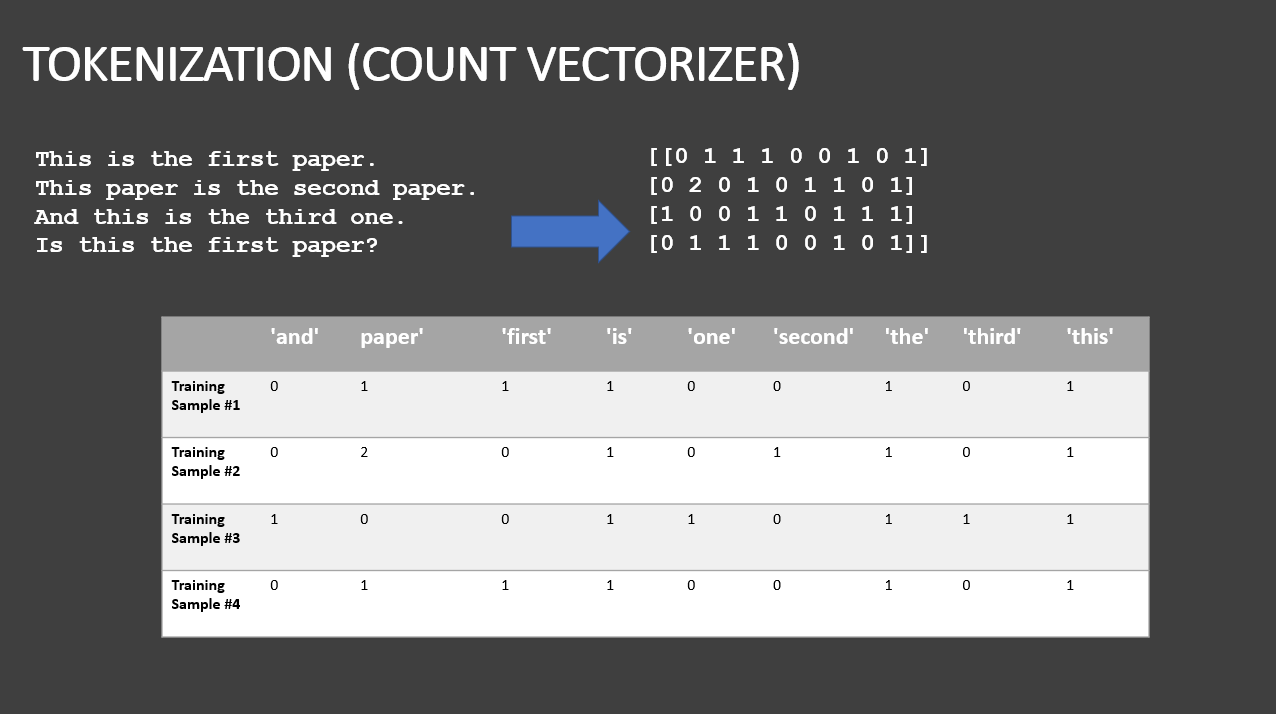
image.png

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This paper is the second paper.','And this is the third one.','Is this the first paper?']

In [137]:
Vectorizer=CountVectorizer()
X=Vectorizer.fit_transform(sample_data)

In [138]:
print(Vectorizer.get_feature_names_out());

['and' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [139]:
print(X.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


In [140]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [141]:
# Let's test the newly added function
df_clean = df['tweet'].apply(message_cleaning)

In [144]:
print(df_clean[13]);

['user', 'cnn', 'calls', 'michigan', 'middle', 'school', 'build', 'wall', 'chant', 'tcot']


In [145]:
print(df['tweet'][13])

@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  


In [146]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer=message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(df['tweet']).toarray().astype('uint8')

In [147]:
tweets_countvectorizer.shape

(8069, 18396)

In [148]:
X=tweets_countvectorizer

In [149]:
y=df['label']

In [150]:
X.shape

(8069, 18396)

In [151]:
y.shape

(8069,)

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [153]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [154]:
X.shape

(8069, 18396)

<Axes: >

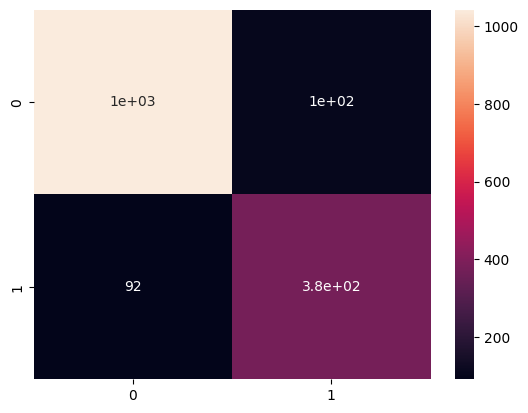

In [155]:
from sklearn.metrics import classification_report, confusion_matrix
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [156]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1146
           1       0.78      0.80      0.79       468

    accuracy                           0.88      1614
   macro avg       0.85      0.86      0.85      1614
weighted avg       0.88      0.88      0.88      1614



In [163]:
new_input = ["ugh thats racism, this should be reported"]  # Wrap the input in a list to create a 2D array

# Assuming you have a vectorizer (e.g., CountVectorizer or TfidfVectorizer) used during training
X_new_input = vectorizer.transform(new_input)

# Use the trained classifier to predict the class of the new input
new_input_prediction = NB_classifier.predict(X_new_input)

# Print the predicted class
print("Predicted class:", new_input_prediction)

Predicted class: [1]
